In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_promo = {
    'Experience_Years':[2,4,5,2,6,5],
    'Performance_Rating':[3,4,5,3,4,4],
    'Promoted':['No','Yes','Yes','No','Yes',None]
}
df=pd.DataFrame(data_promo)
print('Dataset:')
display(df)

Dataset:


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,2,3,No
4,6,4,Yes
5,5,4,None


In [4]:
# clean the data
train_df=df.dropna()

In [5]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,2,3,No
4,6,4,Yes


In [6]:
#spilt data
X = train_df[['Experience_Years','Performance_Rating']]
y = train_df['Promoted']

In [7]:
#create model
model=DecisionTreeClassifier()

In [8]:
#train model
model.fit(X,y)

DecisionTreeClassifier()

In [9]:
#predict
pred_promote = model.predict([[5,4]])[0]
print('Promotion prediction:', pred_promote)

Promotion prediction: Yes


C:\Users\rossy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


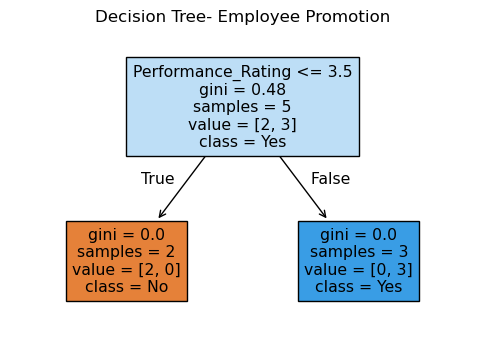

In [11]:
plt.figure(figsize=(6,4))
plot_tree(model,
          feature_names=['Experience_Years','Performance_Rating'],
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree- Employee Promotion')
plt.show()

In [ ]:
# take the experience year and performance rating from user and display promoted or not using prediction
# Write code in this way, there should be no warning message

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data_promo = {
    'Experience_Years':[2,4,5,2,6,5],
    'Performance_Rating':[3,4,5,3,4,4],
    'Promoted':['No','Yes','Yes','No','Yes',None]
}
df=pd.DataFrame(data_promo)
print('Dataset:')
display(df)

Dataset:


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,2,3,No
4,6,4,Yes
5,5,4,None


In [14]:
# clean the data
train_df=df.dropna()

In [15]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,2,3,No
4,6,4,Yes


In [16]:
X = train_df[['Experience_Years','Performance_Rating']]
y = train_df['Promoted']

In [17]:
#create model
model=DecisionTreeClassifier()

In [18]:
#train model
model.fit(X,y)

DecisionTreeClassifier()

In [28]:
exp = float(input("Enter employee experience in years: "))
rating = float(input("Enter performance rating (1 to 5): "))
prediction = model.predict([[exp, rating]])[0]
print(f'Your experience is {exp} and your performance rating {rating}. You likely will be {prediction}')

Enter employee experience in years:  3
Enter performance rating (1 to 5):  3


Your experience is 3.0 and your performance rating 3.0. You likely will be No


C:\Users\rossy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = {
    'Age':[25,30,45,35,22,40,50],
    'Income':['Low','Medium','High','Medium','Low','High','High'],
    'Buy':['No','No','Yes','Yes','No','Yes','Yes']
}
df=pd.DataFrame(data)
df

,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [44]:
encoder=OneHotEncoder(sparse_output=False)
income_encoded=encoder.fit_transform(df[['Income']])
income_encoded_df=pd.DataFrame(income_encoded, columns=encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [46]:
label_encoder=LabelEncoder()
df['Buy']=label_encoder.fit_transform(df['Buy'])
df['Buy']

0    0
1    0
2    1
3    1
4    0
5    1
6    1
Name: Buy, dtype: int64

In [49]:
df_encoded=pd.concat([df[['Age','Buy']], income_encoded_df],axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [53]:
#split data
X=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']
X,y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [54]:
model=DecisionTreeClassifier()

In [55]:
model.fit(X,y)

DecisionTreeClassifier()

In [60]:
sample = pd.DataFrame({'Age':[28],'Income':['Medium']})
sample_encoded = encoder.transform(sample[['Income']]) 
sample_encoded_df=pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))
sample_final=pd.concat([sample[['Age']], sample_encoded_df], axis=1)
prediction=model.predict(sample_final)
predicted_label=label_encoder.inverse_transform(prediction)
print('Prediction for Age=28, Income=Medium ->',predicted_label[0])

Prediction for Age=28, Income=Medium -> No


In [67]:
person_age=int(input('Enter age:'))
person_income=input('Enter category Low,Medium,High')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded = encoder.transform(person[['Income']]) 
person_encoded_df=pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final=pd.concat([person[['Age']], person_encoded_df], axis=1)
prediction=model.predict(person_final)
predicted_label=label_encoder.inverse_transform(prediction)
print(f'Prediction for Age={person_age}, Income={person_income} ->',predicted_label[0])

Enter age: 24
Enter category Low,Medium,High Low


Prediction for Age=24, Income=Low -> No
